In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from numpy.linalg import pinv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
file_path = r"C:\Users\franc\Documents\rna_2\statlog+heart\heart.dat"

# Load the dataset
columns = [
    "age", "sex", "chest_pain", "resting_blood_pressure", 
    "serum_cholesterol", "fasting_blood_sugar", "resting_ecg", 
    "max_heart_rate", "exercise_angina", "oldpeak", 
    "slope", "ca", "thal", "target"
]

# Assuming the file is a CSV
data = pd.read_csv(file_path, delim_whitespace=True, names=columns, header=None)

# Display the first few rows
print(data.head())

data['target'] = data["target"].replace(2, 0)

    age  sex  chest_pain  resting_blood_pressure  serum_cholesterol  \
0  70.0  1.0         4.0                   130.0              322.0   
1  67.0  0.0         3.0                   115.0              564.0   
2  57.0  1.0         2.0                   124.0              261.0   
3  64.0  1.0         4.0                   128.0              263.0   
4  74.0  0.0         2.0                   120.0              269.0   

   fasting_blood_sugar  resting_ecg  max_heart_rate  exercise_angina  oldpeak  \
0                  0.0          2.0           109.0              0.0      2.4   
1                  0.0          2.0           160.0              0.0      1.6   
2                  0.0          0.0           141.0              0.0      0.3   
3                  0.0          0.0           105.0              1.0      0.2   
4                  0.0          2.0           121.0              1.0      0.2   

   slope   ca  thal  target  
0    2.0  3.0   3.0       2  
1    2.0  0.0   7.0       

C:\Users\franc\AppData\Local\Temp\ipykernel_22300\3411641176.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, names=columns, header=None)


In [3]:
class ELM:

    def __init__(self, input_dim, hidden_dim, output_dim):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.W = np.random.randn(self.input_dim, self.hidden_dim)
        self.b = np.random.randn(self.hidden_dim)
        self.beta = None
        self.activation = lambda x: 1 / (1 + np.exp(-x))
    
    def fit(self, X, y):
        H = self.activation(np.dot(X, self.W) + self.b)
        self.beta = np.dot(pinv(H), y)

    def predict(self, X):
        H = self.activation(np.dot(X, self.W) + self.b)
        output = np.dot(H, self.beta)
        print("Output shape:", output.shape)
        return (output > 0.5).astype(int)

In [4]:
X = data.drop('target', axis=1)
y = data['target']



In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
real_columns = ['age', 'resting_blood_pressure', 'serum_cholesterol', 'max_heart_rate', 'oldpeak', 'ca']

scaler = MinMaxScaler()

X[real_columns] = scaler.fit_transform(X[real_columns])



In [7]:
import random

accuracy_results = {}

for j in range(1, 61):
    for i in range(0, 10):

        random_int = random.randint(1, 100)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_int)
        elm = ELM(13, j*5, 1)
        elm.fit(X_train, y_train)
        y_pred = elm.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_results[(i, j)] = accuracy
        

Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)
Output shape: (81,)


In [8]:
import statistics

In [9]:
avg_accuracies = []
std_accuracies = []
neurons = []

In [10]:
for j in range(1, 61):  
    accuracies = [accuracy_results[(i, j)] for i in range(10)]  
    avg_accuracy = statistics.mean(accuracies)
    std_accuracy = statistics.stdev(accuracies)
    avg_accuracies.append(avg_accuracy)
    std_accuracies.append(std_accuracy)
    neurons.append(j*5)
    print(f"Neurons {j*5}: Avg Accuracy = {avg_accuracy:.4f}, Std Dev = {std_accuracy:.4f}")

Neurons 5: Avg Accuracy = 0.7086, Std Dev = 0.0962
Neurons 10: Avg Accuracy = 0.7432, Std Dev = 0.0472
Neurons 15: Avg Accuracy = 0.7741, Std Dev = 0.0354
Neurons 20: Avg Accuracy = 0.7926, Std Dev = 0.0439
Neurons 25: Avg Accuracy = 0.7778, Std Dev = 0.0573
Neurons 30: Avg Accuracy = 0.8198, Std Dev = 0.0416
Neurons 35: Avg Accuracy = 0.7815, Std Dev = 0.0451
Neurons 40: Avg Accuracy = 0.7975, Std Dev = 0.0396
Neurons 45: Avg Accuracy = 0.7778, Std Dev = 0.0395
Neurons 50: Avg Accuracy = 0.7593, Std Dev = 0.0417
Neurons 55: Avg Accuracy = 0.7679, Std Dev = 0.0312
Neurons 60: Avg Accuracy = 0.8000, Std Dev = 0.0558
Neurons 65: Avg Accuracy = 0.7383, Std Dev = 0.0353
Neurons 70: Avg Accuracy = 0.7617, Std Dev = 0.0345
Neurons 75: Avg Accuracy = 0.7519, Std Dev = 0.0236
Neurons 80: Avg Accuracy = 0.7605, Std Dev = 0.0577
Neurons 85: Avg Accuracy = 0.7481, Std Dev = 0.0524
Neurons 90: Avg Accuracy = 0.7531, Std Dev = 0.0476
Neurons 95: Avg Accuracy = 0.7296, Std Dev = 0.0532
Neurons 100: 

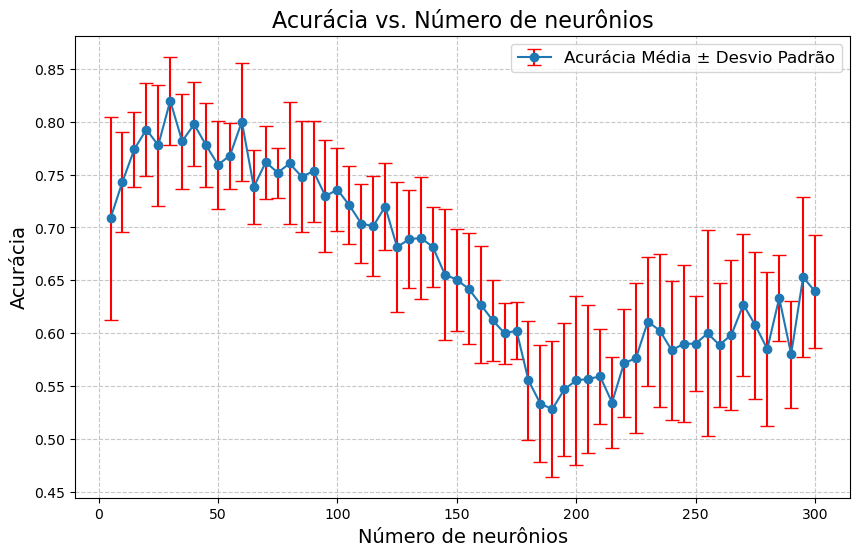

In [11]:
plt.figure(figsize=(10, 6))
plt.errorbar(neurons, avg_accuracies, yerr=std_accuracies, fmt='o-', capsize=5, label="Acurácia Média ± Desvio Padrão", ecolor='red')
plt.title("Acurácia vs. Número de neurônios", fontsize=16)
plt.xlabel("Número de neurônios", fontsize=14)
plt.ylabel("Acurácia", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()

In [12]:
from sklearn.linear_model import Perceptron

perceptron_accuracies = []

for i in range(0,10):
    perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    perceptron.fit(X_train, y_train)
    y_pred = perceptron.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    perceptron_accuracies.append(accuracy)
    



In [13]:
perceptron_avg_accuracy = statistics.mean(accuracies)
perceptron_std_dev = statistics.stdev(accuracies)

In [14]:
perceptron_avg_accuracy

0.6395061728395062

In [15]:
perceptron_std_dev

0.05295706318401783